# Big Boxes Near Corners

In [1]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt

svc = None
X_train_scaler = None

with open('svm.p', 'rb') as f:
    data = pickle.load(f)
    svc = data['svm']
    X_train_scaler = data['scaler']
    orient = data['orient'] 
    pix_per_cell = data['pix_per_cell']
    cell_per_block = data['cell_per_block']
    spatial_feat = data['spatial_feat']
    hist_feat = data['hist_feat']
    hog_feat = data['hog_feat']
    laplacian_feat = data['laplacian_feat']
    color_space = data['color_space']

color_space_code = eval('cv2.COLOR_RGB2' + color_space)

def get_box_features(box_img_rgb):
    box_colorspace = cv2.cvtColor(box_img_rgb, color_space_code)
    features = extract_feature_image(box_colorspace, orient=orient, pix_per_cell=pix_per_cell,
                               cell_per_block=cell_per_block, hog_channel=0,
                               spatial_feat = spatial_feat,
                               hist_feat = hist_feat,
                               hog_feat = hog_feat, 
                               laplacian_feat = laplacian_feat)
    
    # normalize features of the box using the same parameters as were used while training
    return X_train_scaler.transform([np.ravel(features)])

print('SVM loaded: svc')
print('Scaler loaded: X_train_scaler')
print('Color Space:', color_space)

SVM loaded: svc
Scaler loaded: X_train_scaler
Color Space: LAB


In [2]:
import matplotlib.pyplot as plt
from lesson_functions import *

%reload_ext autoreload
%autoreload 2

def has_car(box_img):
    features = get_box_features(box_img)
    return svc.predict(features)

def draw_boxes(img, boxes):
    colors = [(255,0,0),(120,0,0),(0,0,255),(0,0,120),(255,255,0),(0,255,255)]
    img_rect = np.copy(img)
    f, ax = plt.subplots(1, len(boxes), figsize=(5 * len(boxes),5))
    
    for index, box in enumerate(boxes):
        box_img = img[box[0][1]:box[1][1], box[0][0]:box[1][0]]
        box_img = cv2.resize(box_img, (64, 64))
        
        if len(boxes) > 1:
            ax[index].imshow(box_img)
        else:
            ax.imshow(box_img)
        
        # set color according to car found or not
        car = has_car(box_img)
        print(car)
        if car == 1:
            color = (0, 255, 0)
        else:
            color = colors[index % len(colors)]
            
        cv2.rectangle(img_rect, box[0], box[1], color, 4)

    f, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.imshow(img_rect)
    plt.show()

[((760, 10), (1080, 260)), ((696, 10), (1016, 260))]
[ 1.]
[ 1.]


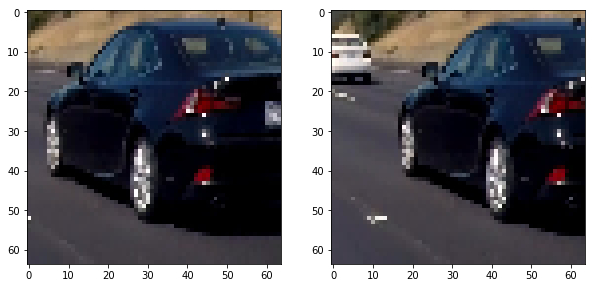

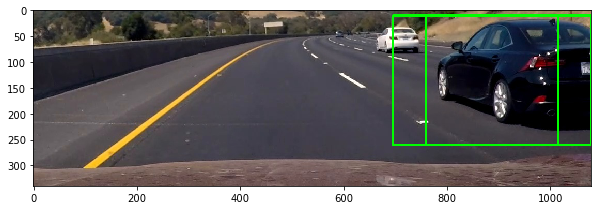

In [7]:
img = load_image('./project_video-frames/0729.jpg', "RGB")
img = img[380:,200:]

boxes = []
#forget about left for the time being
# boxes.extend(get_boxes(img, x_start_stop=[0, 400], y_start_stop=[10, 250], 
#                      box=(340, 250), offset_factor=(0.2,1), no_of_boxes = 2))

x_start = img.shape[1] - 400
x_end = img.shape[1]
y_start = 10
y_end = 250
box = (320, 250)

boxes.extend(get_boxes(img, x_start_stop=[x_start, x_end], y_start_stop=[y_start, y_end], 
                    box=box, offset_factor=(-0.2,1), no_of_boxes = 2))

print(boxes)
draw_boxes(img, boxes)
plt.close('all')

# Smaller Boxes Center

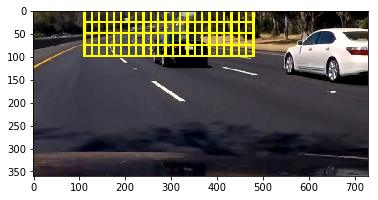

In [40]:
#frame = '0749'
#frame = '0163'
frame = '1052'
img = load_image('./project_video-frames/{}.jpg'.format(frame), "RGB")
#img = img[380:,200:]
img = img[360:,550:]

img_rect = img.copy()

boxes = []
visualise = True

get_boxes(img_rect, 
          x_start_stop=(img.shape[1] - 500, img.shape[1]), 
          y_start_stop=(80, 350), 
          box=(250,200), 
          draw_color = (0, 255, 0), no_of_boxes = 4, offset_factor=(-0.2, 0))
# get_boxes(img_rect, 
#           x_start_stop=(100, img.shape[1]), 
#           y_start_stop=(10, 200), 
#           box=(175,160), 
#           offset_factor=(-0.2,0),
#           draw_color=(255, 0, 0))
# get_boxes(img_rect,
#           x_start_stop=(100, img.shape[1]),
#           y_start_stop=(30, 170),
#           box=(160,120),
#           draw_color=(0, 0, 255), 
#           offset_factor=(-0.3, 0.5))
# get_boxes(img_rect,
#           x_start_stop=(100, img.shape[1]- 250),
#           y_start_stop=(0, 100), 
#           box=(80,50), 
#           draw_color = (255, 255,0), offset_factor=(-0.2, 0.5))

plt.imshow(img_rect)
plt.show()
plt.close('all')
